<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html exercisesweek35.do.txt  -->
<!-- dom:TITLE: Exercises week 35 -->

# Exercises week 35
**August 26-30, 2024**

Date: **Deadline is Friday August 30 at midnight**

## Exercise 1: Analytical exercises

In this exercise we derive the expressions for various derivatives of
products of vectors and matrices. Such derivatives are central to the
optimization of various cost functions. Although we will often use
automatic differentiation in actual calculations, to be able to have
analytical expressions is extremely helpful in case we have simpler
derivatives as well as when we analyze various properties (like second
derivatives) of the chosen cost functions.  Vectors are always written
as boldfaced lower case letters and matrices as upper case boldfaced
letters. You will find useful the notes from week 35 on derivatives of vectors and matrices.
See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

and

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

and

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

and finally find the second derivative of this function with respect to the vector $\boldsymbol{s}$. If we replace the vector $\boldsymbol{s}$ with the unknown parameters $\boldsymbol{\beta}$ used to define the ordinary least squares method, we end up with the equations that determine these parameters. The matrix $\boldsymbol{A}$ is then the design matrix $\boldsymbol{X}$ and $\boldsymbol{x}$ here has to be replaced with the outputs $\boldsymbol{y}$.

The second derivative of the mean squared error is then proportional to the so-called Hessian matrix $\boldsymbol{H}=\boldsymbol{X}^T\boldsymbol{X}$.

**Hint**: In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 2: making your own data and exploring scikit-learn

We will generate our own dataset for a function $y(x)$ where $x \in
[0,1]$ and defined by random numbers computed with the uniform
distribution. The function $y$ is a quadratic polynomial in $x$ with
added stochastic noise according to the normal distribution $\cal
{N}(0,1)$.  The following simple Python instructions define our $x$
and $y$ values (with 100 data points).

In [1178]:
# used codes in chapter 1 at https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html
# as base for custom codes
import numpy as np
import pandas as pd
import sklearn.linear_model as skl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [1179]:
n = 100
randomness_coeff = 0.2
x = np.random.rand(n,1)
y = 2.0 + 5*(x*x) + randomness_coeff * np.random.randn(n,1)

# fancier display than numpy print
results_frame = pd.DataFrame({"x":x.flatten(), "y":y.flatten()})
display(results_frame)

,x,y
0,0.232287,2.520901
1,0.747663,4.681249
2,0.087471,1.979791
3,0.042782,2.516062
4,0.989553,6.666538
...,...,...
95,0.523287,3.569634
96,0.150614,2.397635
97,0.313919,2.456617
98,0.184412,1.842892


1. Write your own code (following the examples under the [regression notes](https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html)) for computing the parametrization of the data set fitting a second-order polynomial. 


In [1180]:
# make design matrix
P = 3
# matrix should correspond to pattern
# beta_1 + beta_2*x + beta_3*x^2
feature_matrix = np.zeros((n, P))

#feature_matrix[:,0] = 1
#feature_matrix[:,1] = x[:,0]
#feature_matrix[:,2] = x[:,0]**2
#feature_matrix[:,3] = x[:,0]**3

# automated way of filling matrix
for exponent in range(0,P):
    feature_matrix[:,exponent] = x[:,0]**exponent

print("feature matrix")
df = pd.DataFrame(feature_matrix)
display(df)


feature matrix


,0,1,2
0,1.0,0.232287,0.053957
1,1.0,0.747663,0.559000
2,1.0,0.087471,0.007651
3,1.0,0.042782,0.001830
4,1.0,0.989553,0.979216
...,...,...,...
95,1.0,0.523287,0.273829
96,1.0,0.150614,0.022685
97,1.0,0.313919,0.098545
98,1.0,0.184412,0.034008


In [1181]:
# optimal beta is now given by
# beta_hat = (X^T X)^-1 X^T y
feature_transposed = np.transpose(feature_matrix)
print("feature matrix shape: ", feature_matrix.shape)
print("transposed:", feature_transposed.shape)

x_t_x = np.matmul(feature_transposed, feature_matrix)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(feature_transposed).dot(y)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = feature_matrix @ beta
df = pd.DataFrame(y_tilde)
print("y tilde")
display(df)

print("add modelled y to display frame along with absolute error")
results_frame["y_tilde"] = y_tilde.flatten()
results_frame["y - y_tilde"] = y.flatten()-y_tilde.flatten()
display(results_frame)

feature matrix shape:  (100, 3)
transposed: (3, 100)
X^T X shape: (3, 3)

beta


,0
0,2.064081
1,-0.355130
2,5.340512


y tilde


,0
0,2.269748
1,4.783912
2,2.073879
3,2.058663
4,6.942173
...,...
95,3.340633
96,2.131741
97,2.478881
98,2.180211


add modelled y to display frame along with absolute error


,x,y,y_tilde,y - y_tilde
0,0.232287,2.520901,2.269748,0.251153
1,0.747663,4.681249,4.783912,-0.102662
2,0.087471,1.979791,2.073879,-0.094088
3,0.042782,2.516062,2.058663,0.457400
4,0.989553,6.666538,6.942173,-0.275636
...,...,...,...,...
95,0.523287,3.569634,3.340633,0.229001
96,0.150614,2.397635,2.131741,0.265894
97,0.313919,2.456617,2.478881,-0.022263
98,0.184412,1.842892,2.180211,-0.337319



2. Use thereafter **scikit-learn** (see again the examples in the slides for week 35) and compare with your own code. Note here that **scikit-learn** does not include, by default, the intercept. See the discussions on scaling your data in the slides for this week. This type of problems appear in particular if we fit a polynomial with an intercept. 


In [1182]:
# if this cell runs twice in a row (without running the above prediction),
# the results are wrong and y_tilde_skl changes - not sure why
clf = skl.LinearRegression().fit(feature_matrix, y)
ytilde_skl = clf.predict(feature_matrix)

In [1183]:
results_frame["scikit y_tilde"] = ytilde_skl
display(results_frame)
# similar y_tilde result

,x,y,y_tilde,y - y_tilde,scikit y_tilde
0,0.232287,2.520901,2.269748,0.251153,2.269748
1,0.747663,4.681249,4.783912,-0.102662,4.783912
2,0.087471,1.979791,2.073879,-0.094088,2.073879
3,0.042782,2.516062,2.058663,0.457400,2.058663
4,0.989553,6.666538,6.942173,-0.275636,6.942173
...,...,...,...,...,...
95,0.523287,3.569634,3.340633,0.229001,3.340633
96,0.150614,2.397635,2.131741,0.265894,2.131741
97,0.313919,2.456617,2.478881,-0.022263,2.478881
98,0.184412,1.842892,2.180211,-0.337319,2.180211



3. Using scikit-learn, compute also the mean squared error, a risk metric corresponding to the expected value of the squared (quadratic) error defined as

$$
MSE(\boldsymbol{y},\boldsymbol{\tilde{y}}) = \frac{1}{n}
\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2,
$$

In [1184]:
def custom_mse(y_true, y_pred):
    n = len(y_true) # number of data points
    mse = (1/n) * np.sum( (y_true - y_pred)**2 )
    return mse 


In [1185]:

calculated_mse = custom_mse(y, y_tilde)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

# scikit mean squared error
mse_skl = mean_squared_error(y, ytilde_skl)                          
print(f"Scikit mean squared error:     {mse_skl:.2f}")

Calculated mean squared error: 0.03
Scikit mean squared error:     0.03


and the $R^2$ score function.
If $\tilde{\boldsymbol{y}}_i$ is the predicted value of the $i-th$ sample and $y_i$ is the corresponding true value, then the score $R^2$ is defined as

$$
R^2(\boldsymbol{y}, \tilde{\boldsymbol{y}}) = 1 - \frac{\sum_{i=0}^{n - 1} (y_i - \tilde{y}_i)^2}{\sum_{i=0}^{n - 1} (y_i - \bar{y})^2},
$$

where we have defined the mean value  of $\boldsymbol{y}$ as

$$
\bar{y} =  \frac{1}{n} \sum_{i=0}^{n - 1} y_i.
$$

In [1186]:
def custom_r2(y_true, y_pred):
    n = len(y_true) # number of data points
    y_mean = (1/n) * np.sum(y_true)
    r2 =  1 - ((np.sum( (y_true - y_pred)**2) ) / (np.sum( (y_true - y_mean)**2 )))
    return r2


In [1187]:

calculated_r2 = custom_r2(y, y_tilde)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

# scikit r^2 score
mse_r2 = r2_score(y, ytilde_skl)                          
print(f"Scikit R^2:     {mse_r2:.2f}")

Calculated R^2: 0.99
Scikit R^2:     0.99


You can use the functionality included in scikit-learn. If you feel for it, you can use your own program and define functions which compute the above two functions. 
Discuss the meaning of these results. Try also to vary the coefficient in front of the added stochastic noise term and discuss the quality of the fits.

In [1188]:
# scikit predictions match manually created predictions
# with low stochastic noise, the match is almost perfect.
# fitting a second order polynomial with a second order polynomial should match well so that is as expected

# increasing noise gradually makes the results diverge, it is no longer sufficient to match a simple polynomial
# coefficient = 20 gives mse 358.28 and R^2 0.01 which is terrible
# changing polynomial degree of model (P) does not help in either case

## Exercise 3: Split data in test and training data

In this exercise we want you to to compute the MSE for the training
data and the test data as function of the complexity of a polynomial,
that is the degree of a given polynomial.  

The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf).
Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

Our data is defined by $x\in [-3,3]$ with a total of for example $n=100$ data points. You should try to vary the number of data points $n$ in your analysis.

In [1189]:
np.random.seed()
n = 100 + np.random.randint(0, 100) # vary data points by random extra
# make data set
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print("x input data, x train, x test")
print(x.shape)
print(x_train.shape)
print(x_test.shape)

print("y data, y train, y test")
print(y.shape)
print(y_train.shape)
print(y_test.shape)

# fancier display than numpy print
results_frame_train = pd.DataFrame({"x_train":x_train.flatten(), "y_train":y_train.flatten()})
results_frame_test = pd.DataFrame({"x_test":x_test.flatten(), "y_test":y_test.flatten()})
display(results_frame_test)

x input data, x train, x test
(119, 1)
(95, 1)
(24, 1)
y data, y train, y test
(119, 1)
(95, 1)
(24, 1)


,x_test,y_test
0,2.440678,1.238422
1,-0.152542,1.007269
2,2.898305,0.679700
3,-0.559322,0.606013
4,1.728814,1.575052
5,-2.288136,0.124508
6,0.966102,0.944961
7,0.101695,1.000131
8,-0.813559,0.589201
9,3.000000,0.554705


where $y$ is the function we want to fit with a given polynomial.

**a)**
Write a first code which sets up a design matrix $X$ defined by a fifth-order polynomial and split your data set in training and test data.

In [1190]:
# make design matrix
P = 5

X_train = np.zeros((len(x_train), P))
X_test = np.zeros((len(x_test), P))
for exponent in range(0,P):
    X_train[:,exponent] = x_train[:,0]**exponent
    X_test[:,exponent] = x_test[:,0]**exponent

print("feature matrix for training data")
df = pd.DataFrame(X_train)
display(df)

print("feature matrix for test data")
df = pd.DataFrame(X_test)
display(df)


feature matrix for training data


,0,1,2,3,4
0,1.0,-1.830508,3.350761,-6.133597,11.227601
1,1.0,-2.338983,5.470842,-12.796206,29.930109
2,1.0,1.525424,2.326918,3.549535,5.414545
3,1.0,1.372881,1.884803,2.587611,3.552483
4,1.0,-2.440678,5.956909,-14.538896,35.484764
...,...,...,...,...,...
90,1.0,1.220339,1.489227,1.817362,2.217798
91,1.0,2.949153,8.697501,25.650256,75.646519
92,1.0,1.067797,1.140190,1.217491,1.300032
93,1.0,0.711864,0.506751,0.360738,0.256797


feature matrix for test data


,0,1,2,3,4
0,1.0,2.440678,5.956909,14.538896,35.484764
1,1.0,-0.152542,0.023269,-0.003550,0.000541
2,1.0,2.898305,8.400172,24.346262,70.562896
3,1.0,-0.559322,0.312841,-0.174979,0.097870
4,1.0,1.728814,2.988796,5.167072,8.932903
5,1.0,-2.288136,5.235564,-11.979681,27.411136
6,1.0,0.966102,0.933352,0.901713,0.871147
7,1.0,0.101695,0.010342,0.001052,0.000107
8,1.0,-0.813559,0.661879,-0.538478,0.438084
9,1.0,3.000000,9.000000,27.000000,81.000000


**b)**
Write thereafter (using either **scikit-learn** or your matrix inversion code using for example **numpy**)
and perform an ordinary least squares fitting and compute the mean squared error for the training data and the test data. These calculations should apply to a model given by a fifth-order polynomial.  If you compare your own code with _scikit_learn_, not that the latter does not include by default the intercept. See the discussions on scaling your data in the slides for this week.

In [1191]:
# optimal beta is given by
# beta_hat = (X^T X)^-1 X^T y

x_t_x = np.matmul(X_train.T, X_train)
print("X^T X shape:", x_t_x.shape)
calc_invert = np.linalg.inv(x_t_x)

beta = calc_invert.dot(X_train.T).dot(y_train)
df = pd.DataFrame(beta)
print("\nbeta")
display(df)

y_tilde = X_train @ beta

print("add modelled y to display frame along with absolute error")
results_frame_train["y_tilde"] = y_tilde.flatten()
results_frame_train["y_train - y_tilde"] = y_train.flatten()-y_tilde.flatten()
display(results_frame_train)

# prediction
y_pred = X_test @ beta

print("predicted y compared with test y and their error")
results_frame_test["y_predict"] = y_pred.flatten()
results_frame_test["y_test - y_predict"] = y_test.flatten()-y_pred.flatten()
display(results_frame_test)

calculated_mse = custom_mse(y_test, y_pred)                          
print(f"Calculated mean squared error: {calculated_mse:.2f}")

calculated_r2 = custom_r2(y_test, y_pred)                          
print(f"Calculated R^2: {calculated_r2:.2f}")

X^T X shape: (5, 5)

beta


,0
0,0.826428
1,0.457234
2,-0.022677
3,-0.035346
4,-0.002813


add modelled y to display frame along with absolute error


,x_train,y_train,y_tilde,y_train - y_tilde
0,-1.830508,0.201542,0.098692,0.102850
1,-2.338983,0.028501,0.001018,0.027483
2,1.525424,1.423659,1.330445,0.093214
3,1.372881,1.320102,1.309961,0.010141
4,-2.440678,0.005684,-0.010529,0.016213
...,...,...,...,...
90,1.220339,1.217831,1.280163,-0.062332
91,2.949153,0.756667,0.858257,-0.101590
92,1.067797,1.094596,1.242115,-0.147519
93,0.711864,0.845040,1.126952,-0.281912


predicted y compared with test y and their error


,x_test,y_test,y_predict,y_test - y_predict
0,2.440678,1.238422,1.193611,0.044811
1,-0.152542,1.007269,0.756277,0.250992
2,2.898305,0.679700,0.902139,-0.222439
3,-0.559322,0.606013,0.569503,0.036510
4,1.728814,1.575052,1.341364,0.233689
5,-2.288136,0.124508,0.007826,0.116681
6,0.966102,0.944961,1.212675,-0.267714
7,0.101695,1.000131,0.872655,0.127477
8,-0.813559,0.589201,0.457233,0.131968
9,3.000000,0.554705,0.811882,-0.257177


Calculated mean squared error: 0.03
Calculated R^2: 0.87


**c)**
Add now a model which allows you to make polynomials up to degree $15$.  Perform a standard OLS fitting of the training data and compute the MSE for the training and test data and plot both test and training data MSE as functions of the polynomial degree. Compare what you see with Figure 2.11 of Hastie et al. Comment your results. For which polynomial degree do you find an optimal MSE (smallest value)?

In [1192]:
def make_feature_matrix(x, P):
    X = np.zeros((len(x), P))
    for exponent in range(0,P):
        X[:,exponent] = x[:,0]**exponent

    return X

def linear_regression_model(X, y):
    beta = (np.linalg.inv(X.T.dot(X))).dot(X.T).dot(y)
    # from https://compphysics.github.io/MachineLearning/doc/LectureNotes/_build/html/chapter1.html#linear-regression-basic-elements

    return beta

def linear_prediction(X, beta):
    y_tilde = X @ beta

    return y_tilde                
    


In [1193]:
# input data
np.random.seed()

#n = 100 + np.random.randint(0, 1000)
n = 200
print(f"number of data points: {n}")

x_full = np.linspace(-3, 3, n).reshape(-1, 1)
y_full = np.exp(-x_full**2) + 1.5 * np.exp(-(x_full-2)**2)+ np.random.normal(0, 0.1, x_full.shape)

P = 27
features_list = list(range(1, P+1))
print(features_list)

train_mses_list = []
train_r2_list = []
test_mses_list = []
test_r2_list = []
for features in features_list:
    calc_feature_matrix = make_feature_matrix(x_full, features)

    X_train, X_test, y_train, y_test = train_test_split(calc_feature_matrix, y_full, test_size=0.2)

    calc_beta = linear_regression_model(X_train, y_train)
    y_tilde = linear_prediction(X_train, calc_beta)
    y_prediction = linear_prediction(X_test, calc_beta)

    #results_frame_test = pd.DataFrame({"x_test":x_full[len(y_train):].flatten(), "y_test":y_test.flatten()})
    #results_frame_test["y_prediction"] = y_prediction.flatten()

    #display(results_frame_test)

    train_calculated_mse = custom_mse(y_train, y_tilde)
    train_mses_list.append(train_calculated_mse)
    train_calculated_r2 = custom_r2(y_train, y_tilde)
    train_r2_list.append(train_calculated_r2)

    #print(f"Train data mean squared error: {train_calculated_mse:.3f}")
    #print(f"Train data R^2: {train_calculated_r2:.3f}")

    #print()

    test_calculated_mse = custom_mse(y_test, y_prediction)
    test_mses_list.append(test_calculated_mse)
    test_calculated_r2 = custom_r2(y_test, y_prediction)
    test_r2_list.append(test_calculated_mse)

    #print(f"Test data mean squared error: {test_calculated_mse:.3f}")
    #print(f"Test data R^2: {test_calculated_r2:.3f}")

number of data points: 200
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


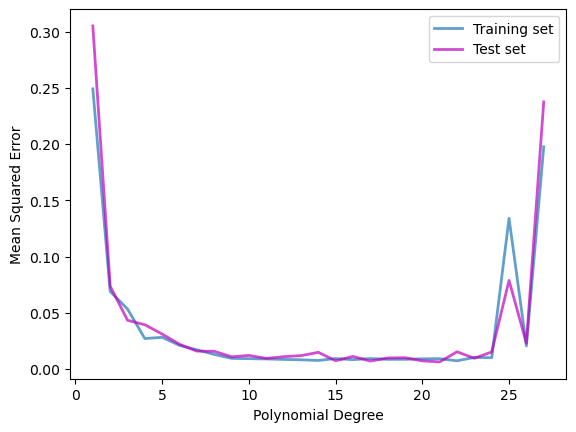

In [1194]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Polynomial Degree')
ax.set_ylabel(r'Mean Squared Error')
ax.plot(features_list, train_mses_list, alpha=0.7, lw=2,
            label='Training set')
ax.plot(features_list, test_mses_list, alpha=0.7, lw=2, c='m',
            label='Test set')
ax.legend()
plt.show()

In [ ]:
# not nearly as smooth as fig 3.11
